In [1]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support, plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
import time
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [2]:
df = pd.read_csv('../../../final_product/data/latest_data.csv')
df.head()

,Unnamed: 0,backers_count,category,country_displayable_name,created_at,deadline,goal_convert,id,launched_at,pledged,...,sub_category,blurb_length,launch_to_deadline,creation_to_launch,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
0,0,2076,food,the United States,2014-11-28 18:42:27,2015-04-10 02:00:00,75000.000000,2147476221,2015-03-02 15:14:38,304142.0,...,drinks,20.0,38,93,Monday,Friday,March,April,2pm-4pm,2am-4am
1,1,0,photography,Canada,2014-07-08 19:50:38,2014-07-24 15:23:00,1148.763315,2147466649,2014-07-11 18:56:05,0.0,...,fine art,22.0,12,2,Friday,Thursday,July,July,6pm-8pm,2pm-4pm
2,2,53,art,the United States,2011-04-25 17:48:20,2011-08-04 04:30:00,18000.000000,2147460119,2011-06-24 19:29:15,18758.0,...,conceptual art,21.0,40,60,Friday,Thursday,June,August,6pm-8pm,4am-6am
3,3,181,games,the United States,2019-09-22 17:11:47,2020-03-19 14:32:55,500.000000,2147450956,2020-02-18 15:33:12,5026.0,...,tabletop games,23.0,29,148,Tuesday,Thursday,February,March,2pm-4pm,2pm-4pm
4,4,52,food,Canada,2014-12-30 17:32:49,2015-02-11 17:26:23,179139.466350,2147437278,2015-01-02 17:26:23,3091.0,...,community gardens,18.0,40,2,Friday,Wednesday,January,February,4pm-6pm,4pm-6pm


In [3]:
# drop columns we wont use
df = df.drop(columns=['backers_count','created_at', 'deadline','launched_at','pledged','usd_pledged','sub_category','launch_day','deadline_day','launch_month','deadline_month','staff_pick'])

In [4]:
df.state.count()

175646

In [5]:
df['state'].value_counts()

successful    102945
failed         72701
Name: state, dtype: int64

In [6]:
df['category'].value_counts()

music           24091
film & video    23801
art             19231
technology      18285
publishing      17465
food            13468
games           12885
fashion          9778
comics           7183
design           6822
photography      5696
crafts           5600
theater          4790
journalism       3695
dance            2856
Name: category, dtype: int64

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [8]:
df.dtypes

Unnamed: 0                    int64
category                     object
country_displayable_name     object
goal_convert                float64
id                            int64
state                        object
blurb_length                float64
launch_to_deadline            int64
creation_to_launch            int64
launch_time                  object
deadline_time                object
dtype: object

In [9]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [10]:
# Generate our categorical variable list
df_object = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_object].nunique()

category                    15
country_displayable_name    22
launch_time                 12
deadline_time               12
dtype: int64

In [11]:
df = df.drop(columns=['id'])
df = df.drop(columns=['Unnamed: 0'])
df

,category,country_displayable_name,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,launch_time,deadline_time
0,food,the United States,75000.000000,1,20.0,38,93,2pm-4pm,2am-4am
1,photography,Canada,1148.763315,0,22.0,12,2,6pm-8pm,2pm-4pm
2,art,the United States,18000.000000,1,21.0,40,60,6pm-8pm,4am-6am
3,games,the United States,500.000000,1,23.0,29,148,2pm-4pm,2pm-4pm
4,food,Canada,179139.466350,0,18.0,40,2,4pm-6pm,4pm-6pm
...,...,...,...,...,...,...,...,...,...
175641,food,the United States,2500.000000,0,21.0,60,0,2am-4am,2am-4am
175642,fashion,Canada,12767.134500,0,23.0,45,92,6pm-8pm,6pm-8pm
175643,food,the United States,20000.000000,0,24.0,30,1,2pm-4pm,4pm-6pm
175644,art,the United Kingdom,194.382350,1,24.0,28,0,10pm-12am,8pm-10pm


In [12]:
df.describe()

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch
count,1.756460e+05,175646.000000,175646.000000,175646.000000,175646.000000
mean,3.757963e+04,0.586094,18.328866,32.453258,47.574662
std,1.020309e+06,0.492534,5.404658,11.993971,134.576302
min,1.000000e-02,0.000000,0.000000,1.000000,0.000000
25%,1.382596e+03,0.000000,15.000000,29.000000,3.000000
50%,4.831460e+03,1.000000,19.000000,30.000000,11.000000
75%,1.200000e+04,1.000000,22.000000,34.000000,36.000000
max,1.291356e+08,1.000000,43.000000,97.000000,3303.000000


In [13]:
# drop state later. do before. if above or below 0.7 drop
cor_test = df.corr()
cor_test

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch
goal_convert,1.000000,-0.033612,-0.000328,0.023836,0.002344
state,-0.033612,1.000000,-0.054032,-0.173746,0.029774
blurb_length,-0.000328,-0.054032,1.000000,0.033795,0.004303
launch_to_deadline,0.023836,-0.173746,0.033795,1.000000,0.021606
creation_to_launch,0.002344,0.029774,0.004303,0.021606,1.000000


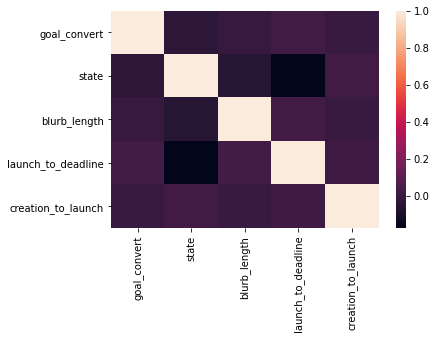

In [14]:
sns.heatmap(cor_test)

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_object]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_object)
encode_df

,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
175644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_object,1)
df

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,75000.000000,1,20.0,38,93,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1148.763315,0,22.0,12,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18000.000000,1,21.0,40,60,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1,23.0,29,148,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179139.466350,0,18.0,40,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175641,2500.000000,0,21.0,60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175642,12767.134500,0,23.0,45,92,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175643,20000.000000,0,24.0,30,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
175644,194.382350,1,24.0,28,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# see all columns to compare to the app model
pd.set_option('display.max_columns', None)
df

,goal_convert,state,blurb_length,launch_to_deadline,creation_to_launch,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_displayable_name_Australia,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,75000.000000,1,20.0,38,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1148.763315,0,22.0,12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18000.000000,1,21.0,40,60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1,23.0,29,148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,179139.466350,0,18.0,40,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175641,2500.000000,0,21.0,60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175642,12767.134500,0,23.0,45,92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175643,20000.000000,0,24.0,30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [18]:
# this creates a random 600 rows to test with the model
df_test= df.drop(columns=['state'])
sample = df_test.sample(n=600)
sample.to_csv( "df_test.csv", index=False)

In [19]:
# Split our preprocessed data into our features and target arrays
y = df["state"].values
X = df.drop(["state"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [21]:
# the model takes 65 inputs
len(X_train_scaled[0])

65

In [22]:
# Define the model - deep neural net
#inputs = 65
#layer one = (2x inputs)
#layer two = (2x inputs)
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features*2
hidden_nodes_layer2 = number_input_features*2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
4117/4117 [==============================] - 3s 750us/step - loss: 0.6037 - accuracy: 0.6781
Epoch 2/50
4117/4117 [==============================] - 3s 665us/step - loss: 0.5834 - accuracy: 0.6945
Epoch 3/50
4117/4117 [==============================] - 3s 651us/step - loss: 0.5732 - accuracy: 0.7018
Epoch 4/50
4117/4117 [==============================] - 3s 642us/step - loss: 0.5673 - accuracy: 0.7059
Epoch 5/50
4117/4117 [==============================] - 3s 644us/step - loss: 0.5627 - accuracy: 0.7099
Epoch 6/50
4117/4117 [==============================] - 3s 646us/step - loss: 0.5589 - accuracy: 0.7124
Epoch 7/50
4117/4117 [==============================] - 3s 640us/step - loss: 0.5566 - accuracy: 0.7142
Epoch 8/50
4117/4117 [==============================] - 3s 642us/step - loss: 0.5528 - accuracy: 0.7166
Epoch 9/50
4117/4117 [==============================] - 3s 644us/step - loss: 0.5512 - accuracy: 0.7170
Epoch 10/50
4117/4117 [==============================] - 3s 653u

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1373/1373 - 1s - loss: 0.6283 - accuracy: 0.6978
Loss: 0.6283473968505859, Accuracy: 0.6977591514587402


the model shows somes sign of overfitting. 75.58% on training data vs 70% on the test data

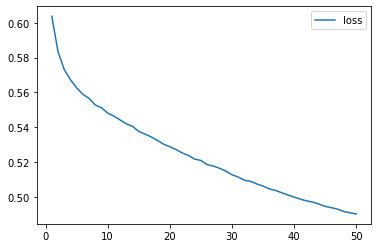

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

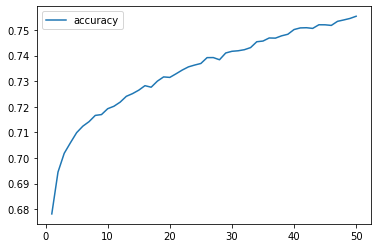

In [25]:
# Plot the loss
history_df.plot(y="accuracy")

In [26]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.633


In [27]:
#logistic regression model is not for us. too low

In [28]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.726


we are going to use random forest as it has an almost 73% accuracy


In [29]:
# this shows more RF info of our model.
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_hat_train2 = best_rf.predict(X_train)
rf_y_hat_test2 = best_rf.predict(X_test)

print("Random Forest score for training set:", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test2))

Random Forest score for training set: 0.75495
Random Forest score for test set: 0.7267

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.56      0.63     18114
           1       0.73      0.84      0.78     25798

    accuracy                           0.73     43912
   macro avg       0.72      0.70      0.71     43912
weighted avg       0.73      0.73      0.72     43912



Feature: 0, Score: 0.25515
Feature: 1, Score: 0.03671
Feature: 2, Score: 0.12056
Feature: 3, Score: 0.18355
Feature: 4, Score: 0.00641
Feature: 5, Score: 0.02219
Feature: 6, Score: 0.01495
Feature: 7, Score: 0.00523
Feature: 8, Score: 0.00633
Feature: 9, Score: 0.00365
Feature: 10, Score: 0.00696
Feature: 11, Score: 0.06484
Feature: 12, Score: 0.00926
Feature: 13, Score: 0.01748
Feature: 14, Score: 0.01501
Feature: 15, Score: 0.01512
Feature: 16, Score: 0.01398
Feature: 17, Score: 0.04933
Feature: 18, Score: 0.00317
Feature: 19, Score: 0.00274
Feature: 20, Score: 0.00145
Feature: 21, Score: 0.00124
Feature: 22, Score: 0.00275
Feature: 23, Score: 0.00136
Feature: 24, Score: 0.00212
Feature: 25, Score: 0.00302
Feature: 26, Score: 0.00322
Feature: 27, Score: 0.00138
Feature: 28, Score: 0.00667
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00014
Feature: 31, Score: 0.00564
Feature: 32, Score: 0.00117
Feature: 33, Score: 0.00109
Feature: 34, Score: 0.00081
Feature: 35, Score: 0.00261
Fe

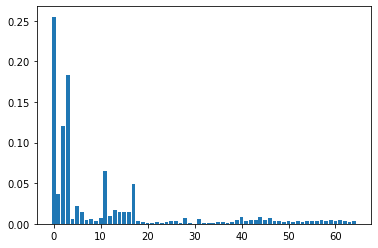

In [30]:
# get feature importances
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
print(rf_model.predict(X_test))

[0 0 0 ... 0 0 0]


In [32]:
#pickle the model
import pickle
pickle.dump(rf_model, open("model.pkl","wb"))